  # Credit Card Analysis for Customer Personality Segmentation

 # 1. problem Discription
Suppose you are a data analyst working for a financial services company that offers credit cards. You have given a dataset that includes
different attributes such as customer ID, balance, purchase amounts, cash advances, credit limits, payment behavior, and more.

This project aims to classify customers according to how they have paid with their credit cards during the last six months. You can find
a great deal about your clients tastes, spending patterns, and financial activity by grouping them into useful segments. You will be able
to create focused marketing plans that are suited to the requirements and tastes of all of the customers.

the dataset we have contains the following 18 attributes:
1. Cust_id: identification of credit card holder.
2. Balance: balance amount left in their account to make purchases.
3. Balance_frequency: how frequently the balance is updated, score between 0
and 1 (1 = frequently updated, 0 = not frequently updated).
4. Purchases: amount of purchases made from account.
5. Oneoff_purchases : maximum purchase amount done in one-go.
6. Installments_purchases : amount of purchase done in installment.
7. Cash_advance : cash in advance given by the user.
8. Purchases_frequency : how frequently the purchases are being made, score
between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased).
9. Oneoffpurchasesfrequency : how frequently purchases are happening in one-go
(1 = frequently purchased, 0 = not frequently purchased).
10. Purchasesinstallmentsfrequency: how frequently purchases in installments are
being done (1 = frequently done, 0 = not frequently done).
11. Cashadvancefrequency : how frequently the cash in advance being paid.
12. Cashadvancetrx: number of transactions made with "cash in advanced".
13. Purchases_trx: number of purchase transactions made.
14. Credit_limit: limit of credit card for user.
15. Payments: amount of payment done by user.
16. Minimum_payments: minimum amount of payments made by user.
17. Prcfullpayment: percent of full payment paid by user.
18. Tenure: tenure of credit card service for user.

 # 2.Import libraries
  `pandas` is a popular Python-based data analysis framework.It provide data structures and functions needed to manipulate structured data.
  
  `matplotlib` is a graph plotting library in Python that serve as a visualization utility.
  
  `missingno` it's a package for graphical analysis of missing values.
  
  `numpy`  is a foundational library for numerical and scientific computing in Python. It provides support for large, multi-dimensional arrays and matrices, along with a collection of mathematical functions.
  
  `seaborn` is a Python data visualization library based on Matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import missingno as msno
from sklearn.cluster import KMeans
import sklearn.cluster as cluster
from sklearn.cluster import KMeans
from scipy import stats
from sklearn.preprocessing import StandardScaler,normalize

# 3.Import Dataset

In [33]:
#import the data set
df = pd.read_csv('customers_credit_cards.csv')

# 4. Exploratory Data Analysis

In [34]:
#read the first 5 rows of the datset
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


`df.shape` attribute in pandas is used to get the dimensions of a DataFrame

In [35]:
df.shape

(8950, 18)

The `describe()` method returns a summary of the numerical attributes. The `count`, `mean`, `min`, and `max` rows are self-explanatory.The `25%`, `50%`, and `75%` rows show the corresponding percentiles: a percentile indicates the value below which a given percentage of observations in a group of observations falls.

In [36]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


`df.dtypes` attribute in pandas is used to get the data types of each column in a DataFrame. 

In [37]:
df.dtypes

CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

 # 5.Data cleaning
 

`isna()` function to detect missing values. `df.isna()` returns the dataframe with boolean values indicating missing values.

`df.isna().sum()` returns the number of missing values in each column.

In [38]:
#check if there is any null values
df.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

`msno.bar()` function is used to create a bar plot that visualizes the completeness of the data in a DataFrame.

<Axes: >

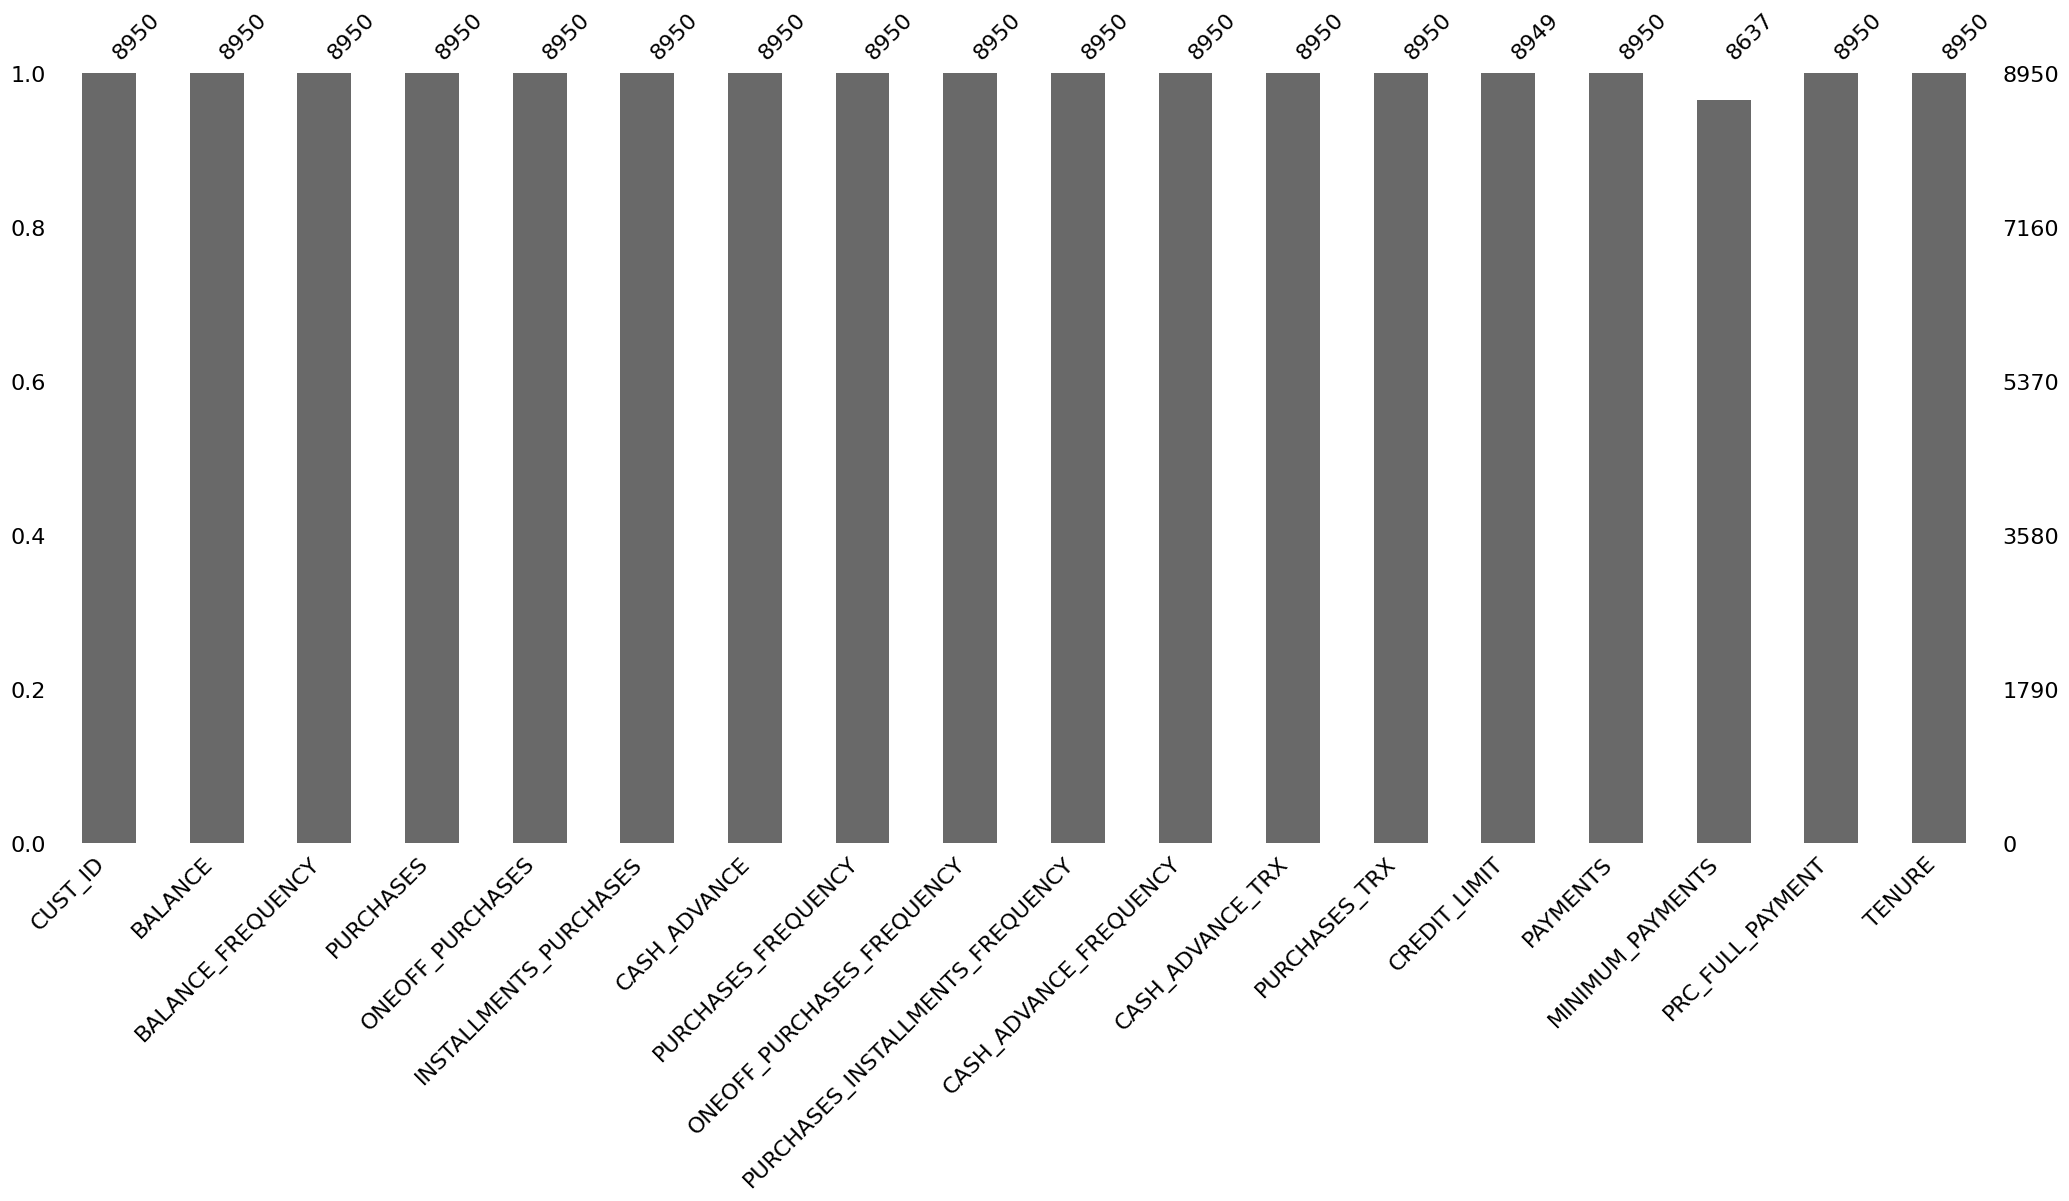

In [39]:
msno.bar(df)

`df.dropna()` method is used to remove rows or columns with missing values (NaN or None) from a DataFrame. By default, this method removes rows containing any NaN values.

`isnull()` it returns a DataFrame of the same shape as the original DataFrame, where each element is True if it is a missing value (NaN) and False otherwise.

In [40]:
df.dropna(subset=['CREDIT_LIMIT'], how='any', inplace=True)
df['CREDIT_LIMIT'].isnull().sum()

0

In [41]:
df.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          0
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

`mean()` method in pandas is used to calculate the mean (average) value of numeric columns in a DataFrame or Series.

`fillna()` method in pandas is used to fill missing (NaN) values in a DataFrame or Series with specified values. 

`.to_csv()`is used to write a DataFrame to a CSV file.

`.info()` is to print the description of the data.

In [42]:
mean_value = df['MINIMUM_PAYMENTS'].mean()
print(mean_value)
#Replace null values in column MINIMUM_PAYMENTS with the mean of values in the same column
df.fillna({'MINIMUM_PAYMENTS':mean_value}, inplace=True)
df.to_csv('resultAfterReplacingWithMeanFile.csv')
df.info()

864.3049429326078
<class 'pandas.core.frame.DataFrame'>
Index: 8949 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8949 non-null   object 
 1   BALANCE                           8949 non-null   float64
 2   BALANCE_FREQUENCY                 8949 non-null   float64
 3   PURCHASES                         8949 non-null   float64
 4   ONEOFF_PURCHASES                  8949 non-null   float64
 5   INSTALLMENTS_PURCHASES            8949 non-null   float64
 6   CASH_ADVANCE                      8949 non-null   float64
 7   PURCHASES_FREQUENCY               8949 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8949 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8949 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8949 non-null   float64
 11  CASH_ADVANCE_TRX                  8949 non-null   int64 

In [43]:
df.isna().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [44]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.304943,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [45]:
#Drop CUST_ID column
df.drop(['CUST_ID'], axis = 1, inplace = True)

In [46]:
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.304943,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [47]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000
mean,1564.647593,0.877350,1003.316936,592.503572,411.113579,978.959616,0.490405,0.202480,0.364478,0.135141,3.249078,14.711476,4494.449450,1733.336511,864.304943,0.153732,11.517935
std,2081.584016,0.236798,2136.727848,1659.968851,904.378205,2097.264344,0.401360,0.298345,0.397451,0.200132,6.824987,24.858552,3638.815725,2895.168146,2330.700932,0.292511,1.337134
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.365782,0.888889,39.800000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.282850,170.875613,0.000000,12.000000
50%,873.680279,1.000000,361.490000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,857.062706,335.657631,0.000000,12.000000
75%,2054.372848,1.000000,1110.170000,577.830000,468.650000,1113.868654,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.279320,864.304943,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


# 6.Data visualization:

`distplot()` function is part of the seaborn library and is used to plot univariate distributions of data. It combines a histogram with a kernel density estimate (KDE) plot.

`show()` is a function to display the plot.

C:\Users\Zahraa's\AppData\Local\Temp\ipykernel_24636\3778658042.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df[i])


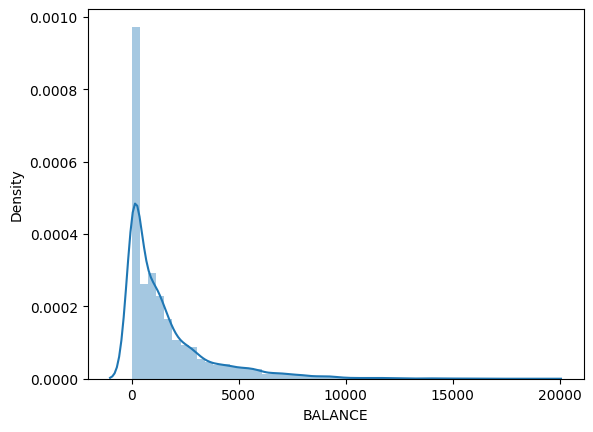

C:\Users\Zahraa's\AppData\Local\Temp\ipykernel_24636\3778658042.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df[i])


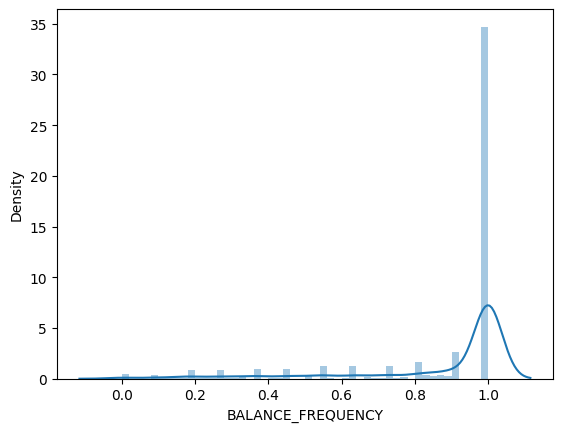

C:\Users\Zahraa's\AppData\Local\Temp\ipykernel_24636\3778658042.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df[i])


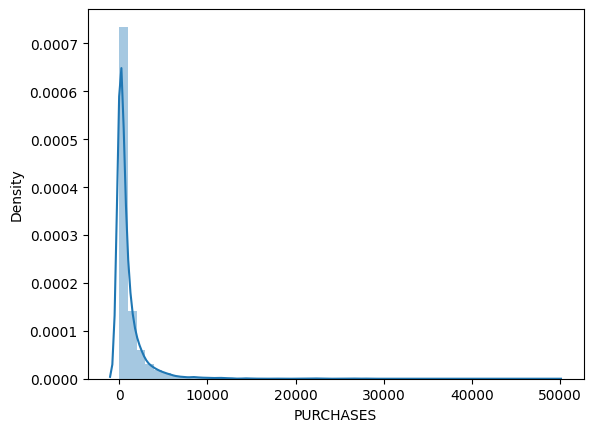

C:\Users\Zahraa's\AppData\Local\Temp\ipykernel_24636\3778658042.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df[i])


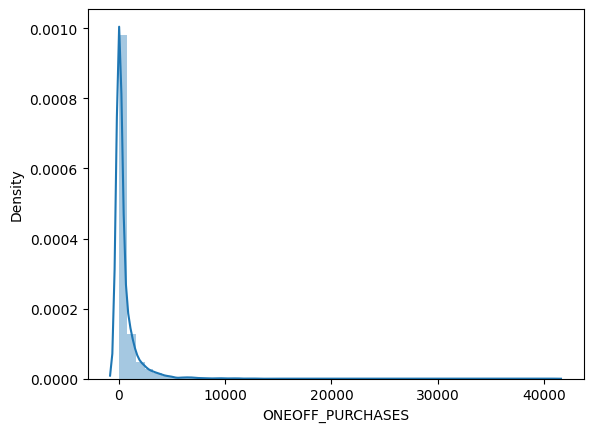

C:\Users\Zahraa's\AppData\Local\Temp\ipykernel_24636\3778658042.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df[i])


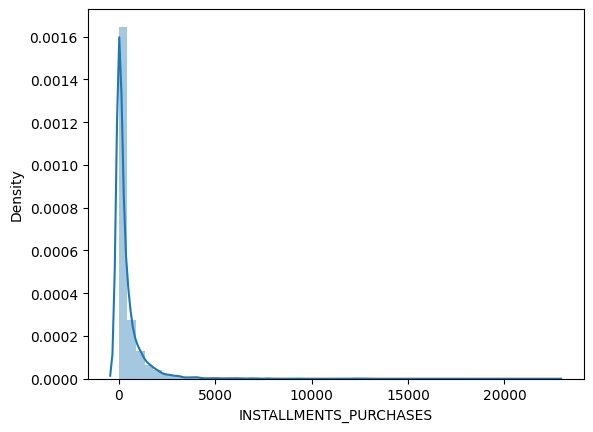

C:\Users\Zahraa's\AppData\Local\Temp\ipykernel_24636\3778658042.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df[i])


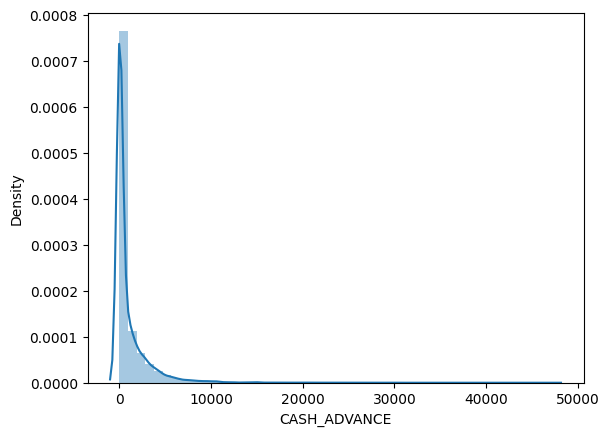

C:\Users\Zahraa's\AppData\Local\Temp\ipykernel_24636\3778658042.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df[i])


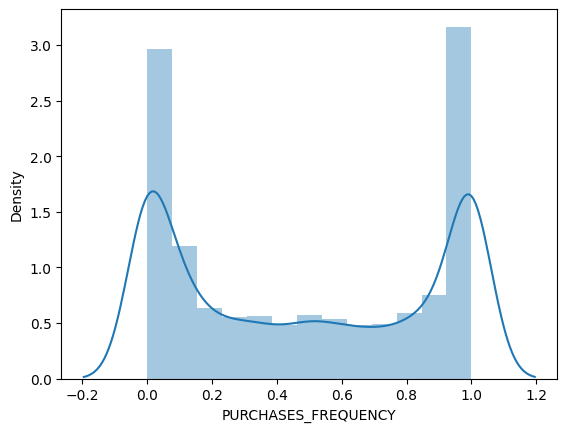

C:\Users\Zahraa's\AppData\Local\Temp\ipykernel_24636\3778658042.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df[i])


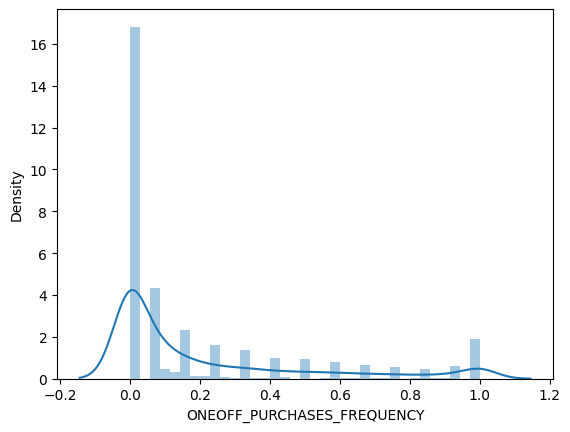

C:\Users\Zahraa's\AppData\Local\Temp\ipykernel_24636\3778658042.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df[i])


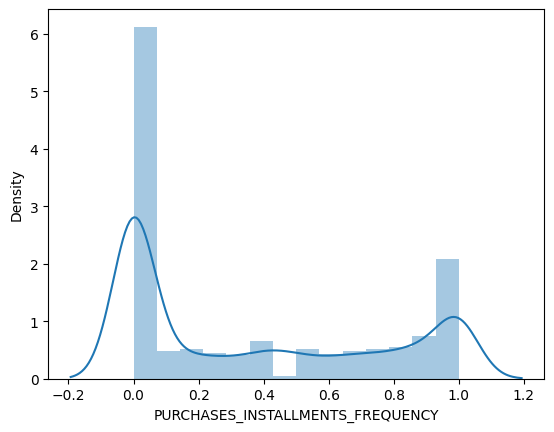

C:\Users\Zahraa's\AppData\Local\Temp\ipykernel_24636\3778658042.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df[i])


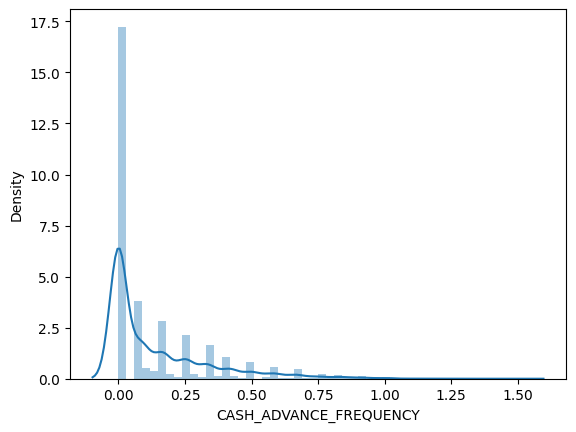

C:\Users\Zahraa's\AppData\Local\Temp\ipykernel_24636\3778658042.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df[i])


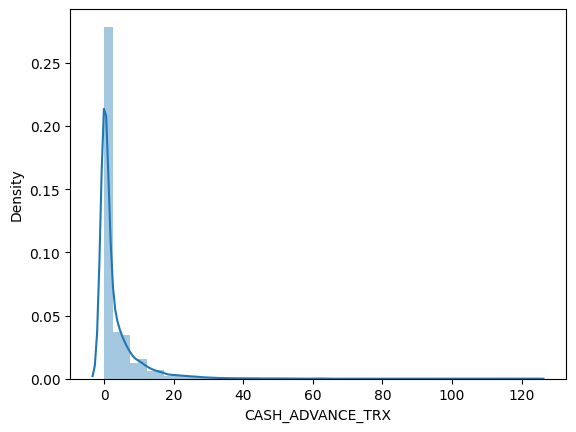

C:\Users\Zahraa's\AppData\Local\Temp\ipykernel_24636\3778658042.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df[i])


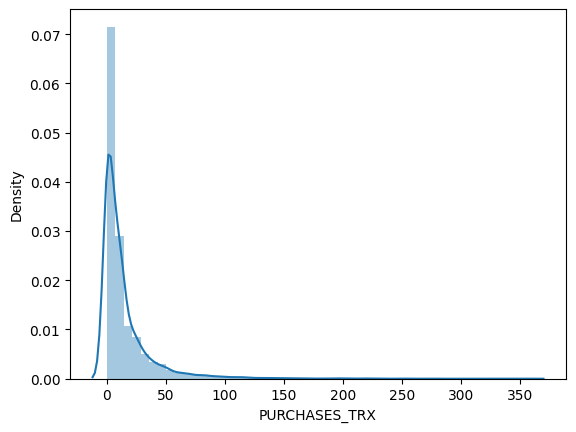

C:\Users\Zahraa's\AppData\Local\Temp\ipykernel_24636\3778658042.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df[i])


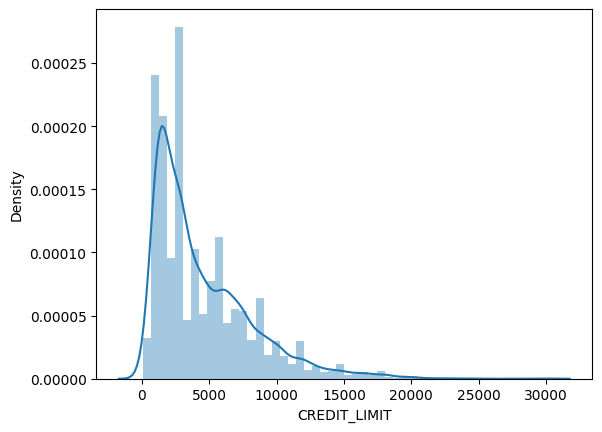

C:\Users\Zahraa's\AppData\Local\Temp\ipykernel_24636\3778658042.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df[i])


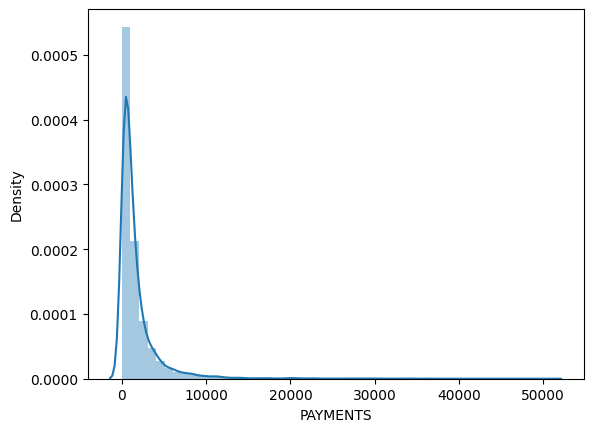

C:\Users\Zahraa's\AppData\Local\Temp\ipykernel_24636\3778658042.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df[i])


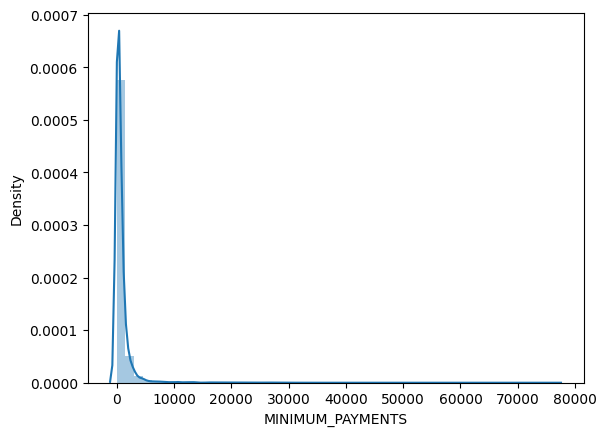

C:\Users\Zahraa's\AppData\Local\Temp\ipykernel_24636\3778658042.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df[i])


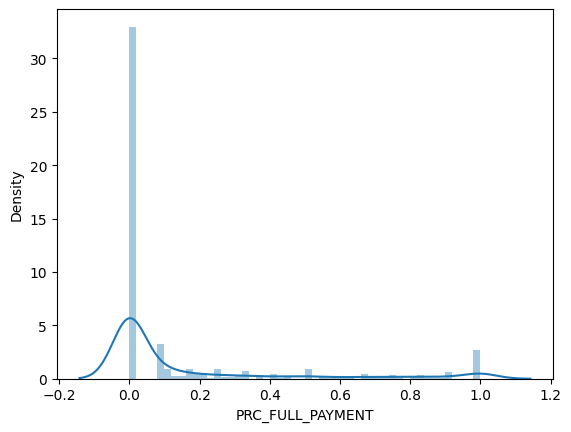

C:\Users\Zahraa's\AppData\Local\Temp\ipykernel_24636\3778658042.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df[i])


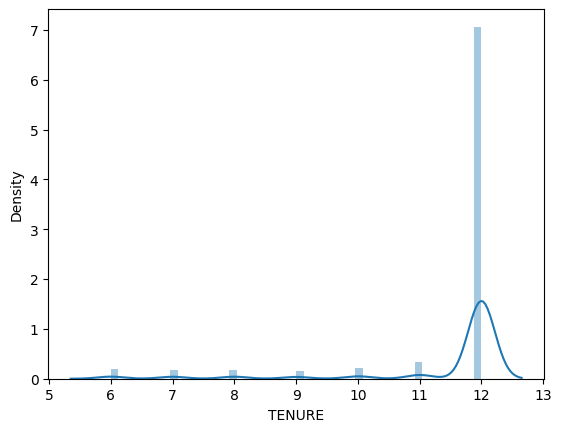

In [48]:
for i in df.columns:
    sb.distplot(df[i])
    plt.show()

`.figure()`is used to create a new figure with a specific size.


`.boxplot()` is used to create a boxplot visualization.Creates a boxplot to visualize the distribution of data within the DataFrame df. The boxplot includes elements such as whiskers, box boundaries (representing quartiles), median line, and potential outliers.


`.xticks()`  is used to rotate the x-axis tick labels.


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 [Text(0, 0, 'BALANCE'),
  Text(1, 0, 'BALANCE_FREQUENCY'),
  Text(2, 0, 'PURCHASES'),
  Text(3, 0, 'ONEOFF_PURCHASES'),
  Text(4, 0, 'INSTALLMENTS_PURCHASES'),
  Text(5, 0, 'CASH_ADVANCE'),
  Text(6, 0, 'PURCHASES_FREQUENCY'),
  Text(7, 0, 'ONEOFF_PURCHASES_FREQUENCY'),
  Text(8, 0, 'PURCHASES_INSTALLMENTS_FREQUENCY'),
  Text(9, 0, 'CASH_ADVANCE_FREQUENCY'),
  Text(10, 0, 'CASH_ADVANCE_TRX'),
  Text(11, 0, 'PURCHASES_TRX'),
  Text(12, 0, 'CREDIT_LIMIT'),
  Text(13, 0, 'PAYMENTS'),
  Text(14, 0, 'MINIMUM_PAYMENTS'),
  Text(15, 0, 'PRC_FULL_PAYMENT'),
  Text(16, 0, 'TENURE')])

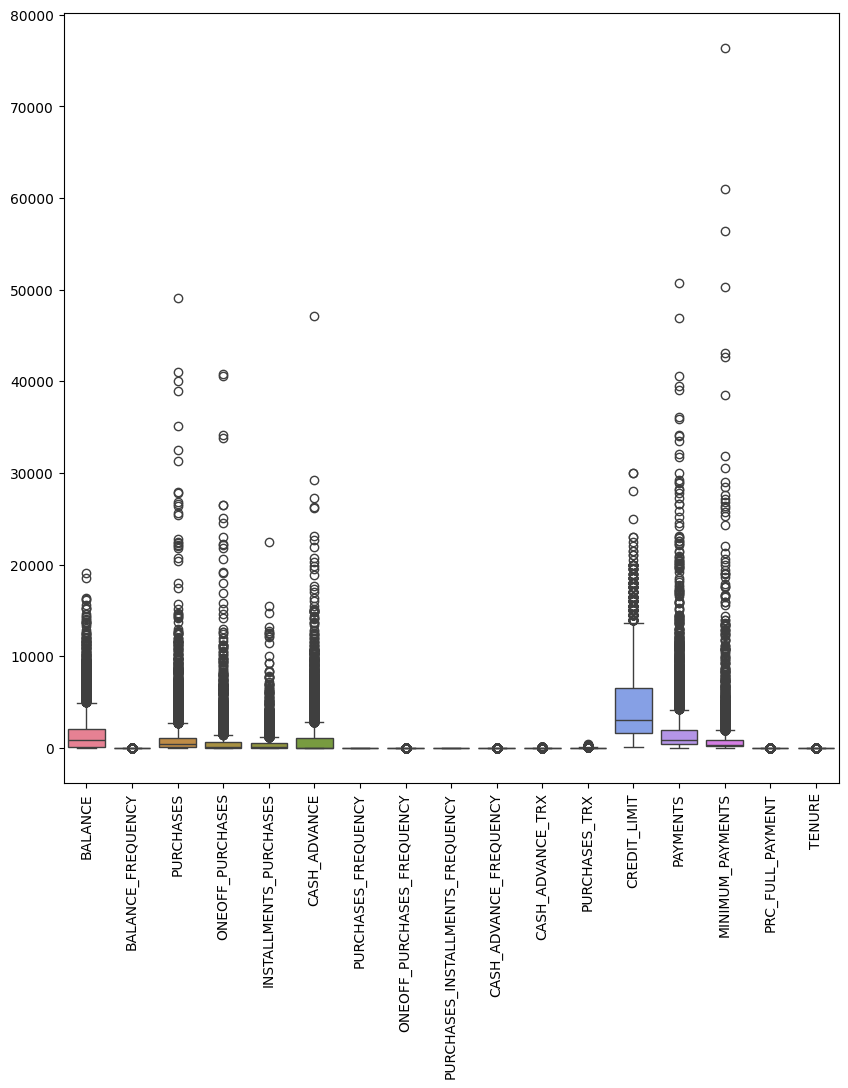

In [49]:
plt.figure(figsize=(10,10))
sb.boxplot(data=df)
plt.xticks(rotation=90)

`.abs()`  is used to calculate the absolute values of the Z-scores. It ensures that both positive and negative deviations are treated equally when identifying outliers.

`.zscore()` also called a standard score, is a value/score that helps to understand that how far is the data point from the mean. `Z- Score` of data points can be used to detect outliers.The data points which fall below `mean-3*(sigma)` or above `mean+3*(sigma)` are outliers, where mean and sigma are the average value and standard deviation of a particular column.Now to define an outlier, a threshold value equal to `3.0` is chosen as `99.7%` of the data points lie between `+/- 3` standard deviation.

   A normal distribution is calculated and it is estimated that:    
- 68% of the data points lie between +/- 1 standard deviation.    
- 95% of the data points lie between +/- 2 standard deviati.o    n
- 99.7% of the data points lie between +/- 3 standard deviat.

`thre` Represents the threshold value beyond which a Z-score is considered an outlier. In this case, any Z-score greater than 3 or less than -3 is considered an outlier.ion

In [50]:
z=np.abs(stats.zscore(df))
print(z)
thre=3
df1=df[(z<3).all(axis=1)]

       BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     0.732054           0.249881   0.424934          0.356957   
1     0.786858           0.134049   0.469584          0.356957   
2     0.447041           0.517980   0.107716          0.108843   
3     0.049015           1.017743   0.231995          0.546123   
4     0.358849           0.517980   0.462095          0.347317   
...        ...                ...        ...               ...   
8945  0.738015           0.517980   0.333331          0.356957   
8946  0.742488           0.517980   0.329174          0.356957   
8947  0.740463           0.185895   0.402000          0.356957   
8948  0.745239           0.185895   0.469584          0.356957   
8949  0.572644           0.889766   0.042092          0.301677   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                   0.349114      0.466805             0.806649   
1                   0.454607      2.605438             1.221928   
2     

In [51]:
df1.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.304943,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


`StandardScaler()` can be used to scale the attributes. It transforms the features by scaling each feature to a given range.

`fit_transform()` is used on the training data so that we can scale the training data 
and also learn the scaling parameters of that data
      -The `fit()` method is used to compute the mean and std dev for a given 
feature to be used further for scaling.      -T Th`e transfort`a) method is used to perform scaling using mean and s d
dev calculated using the fit() metho      -
• `The fit_transfo`rm() method does both fits and transf

`.DataFrame()`is a constructor method provided by the pandas library. It is used to create a DataFrame, which is a two-dimensional, size-mutable, and potentially heterogeneous tabular data structure with labeled axes (rows and columns). orm..

In [52]:
scaler = StandardScaler()
scaled_df=scaler.fit_transform(df1)
scaled_df=pd.DataFrame(scaled_df,columns=df1.columns)

In [53]:
scaled_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.809652,-0.334911,-0.641448,-0.543505,-0.448067,-0.543984,-0.805098,-0.668791,-0.698321,-0.690806,-0.587319,-0.665235,-1.021765,-0.762853,-0.577806,-0.531523,0.312187
1,1.273272,0.091127,-0.734487,-0.543505,-0.636612,4.671914,-1.225631,-0.668791,-0.910579,0.883825,0.427706,-0.797517,1.022039,1.953121,0.623744,0.232637,0.312187
2,0.807271,0.517164,0.019551,0.430864,-0.636612,-0.543984,1.297564,2.808268,-0.910579,-0.690806,-0.587319,-0.003826,1.192356,-0.470272,0.050482,-0.531523,0.312187
3,0.261448,-1.186986,0.727420,1.345575,-0.636612,-0.377388,-1.015366,-0.379037,-0.910579,-0.165931,-0.333563,-0.731376,1.192356,-0.903344,0.355781,-0.531523,0.312187
4,-0.297867,0.517164,-0.718883,-0.523341,-0.636612,-0.543984,-1.015366,-0.379037,-0.910579,-0.690806,-0.587319,-0.731376,-0.953638,-0.431099,-0.442196,-0.531523,0.312187


`.normalize()` is a function from scikit-learn scales each feature vector (row) in the DataFrame scaled_df to have a Euclidean norm (L2 norm) of 1.

In [54]:
normdf=normalize(scaled_df)
normdf=pd.DataFrame(normdf,columns=df.columns)

In [55]:
normdf.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.302606,-0.125172,-0.239740,-0.203134,-0.167464,-0.203313,-0.300904,-0.249959,-0.260996,-0.258187,-0.219509,-0.248630,-0.381882,-0.285115,-0.215954,-0.198656,0.116679
1,0.216855,0.015520,-0.125093,-0.092566,-0.108423,0.795687,-0.208741,-0.113904,-0.155083,0.150527,0.072844,-0.135827,0.174066,0.332642,0.106232,0.039621,0.053170
2,0.208068,0.133295,0.005039,0.111052,-0.164082,-0.140208,0.334438,0.723811,-0.234695,-0.178050,-0.151377,-0.000986,0.307321,-0.121209,0.013011,-0.136996,0.080464
3,0.083574,-0.379430,0.232526,0.430124,-0.203499,-0.120635,-0.324570,-0.121163,-0.291074,-0.053041,-0.106626,-0.233791,0.381147,-0.288762,0.113728,-0.169906,0.099793
4,-0.113563,0.197171,-0.274078,-0.199526,-0.242711,-0.207397,-0.387113,-0.144510,-0.347162,-0.263373,-0.223918,-0.278841,-0.363579,-0.164358,-0.168589,-0.202646,0.119023


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 [Text(0, 0, 'BALANCE'),
  Text(1, 0, 'BALANCE_FREQUENCY'),
  Text(2, 0, 'PURCHASES'),
  Text(3, 0, 'ONEOFF_PURCHASES'),
  Text(4, 0, 'INSTALLMENTS_PURCHASES'),
  Text(5, 0, 'CASH_ADVANCE'),
  Text(6, 0, 'PURCHASES_FREQUENCY'),
  Text(7, 0, 'ONEOFF_PURCHASES_FREQUENCY'),
  Text(8, 0, 'PURCHASES_INSTALLMENTS_FREQUENCY'),
  Text(9, 0, 'CASH_ADVANCE_FREQUENCY'),
  Text(10, 0, 'CASH_ADVANCE_TRX'),
  Text(11, 0, 'PURCHASES_TRX'),
  Text(12, 0, 'CREDIT_LIMIT'),
  Text(13, 0, 'PAYMENTS'),
  Text(14, 0, 'MINIMUM_PAYMENTS'),
  Text(15, 0, 'PRC_FULL_PAYMENT'),
  Text(16, 0, 'TENURE')])

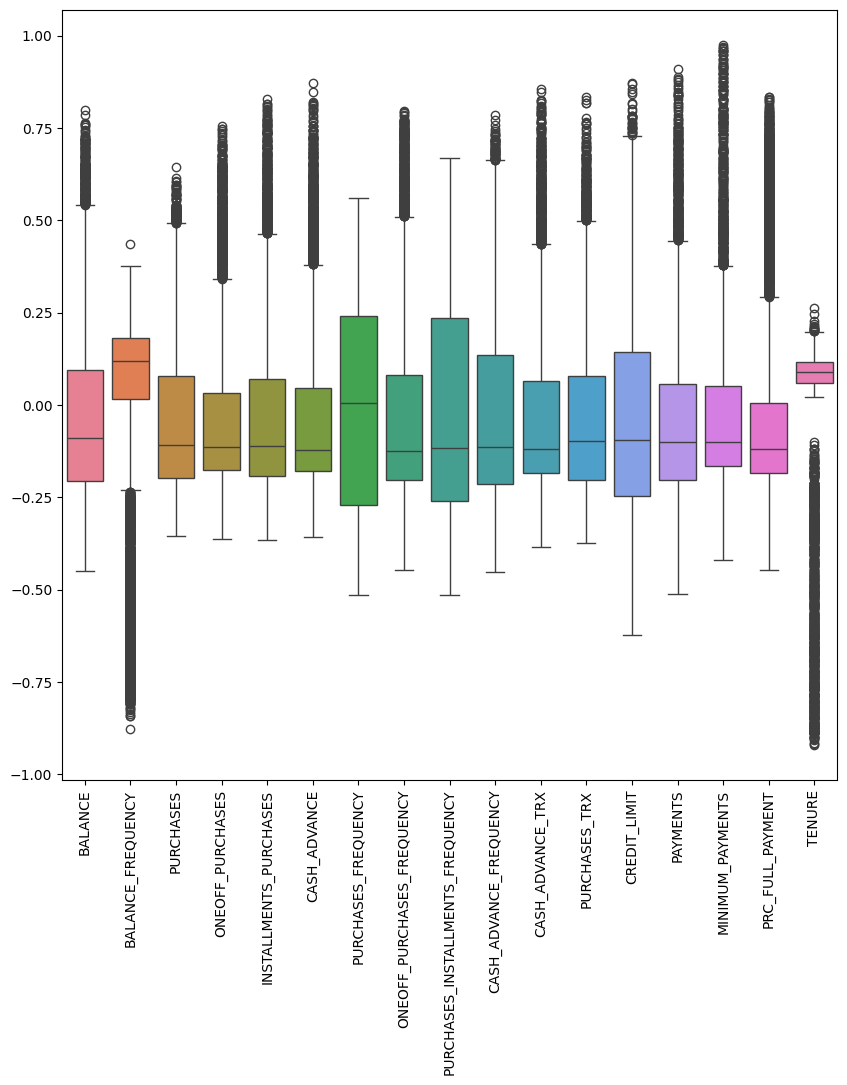

In [56]:
plt.figure(figsize=(10,10))
sb.boxplot(data=normdf)
plt.xticks(rotation=90)

In [57]:
normdf.shape

(7434, 17)

# 7.Model Training and Testing – Methodology:

**`K-means`** clustering is a popular unsupervised machine learning algorithm used to partition a dataset into K distinct, non-overlapping subsets or clusters. Each data point belongs to the cluster with the nearest mean (centroid), serving as a prototype of the cluster.

In this case K-means is often preferred for credit card customer segmentation due to its scalability, efficiency, and ease of interpretation. HCA can be valuable for exploratory analysis and understanding the hierarchical relationships between clusters, but its computational intensity and complexity can make it less suitable for large datasets and operational use cases.

`.fit()` is a crucial component of many machine learning models and algorithms in libraries such as scikit-learn. It is used to train a model on a given dataset.

`inertia` attribute measures how well a dataset was clustered by K-means. It is calculated by measuring the distance between each data point and its centroid, squaring this distance, and summing these squares across one cluster.

In [58]:
K = range(2,12)
wss = []

for k in K:
    model = KMeans(n_clusters=k)
    model = model.fit(normdf)
    wss_iter = model.inertia_
    wss.append(wss_iter)

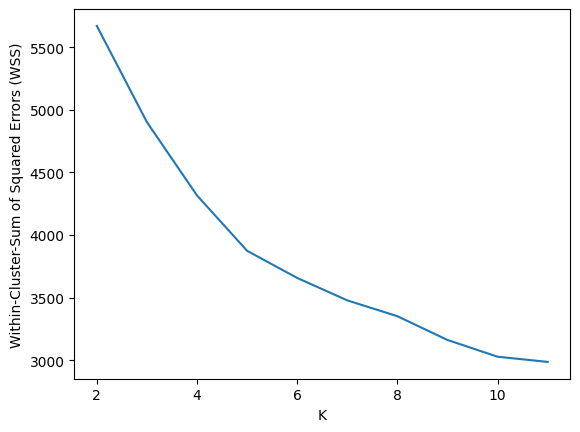

In [35]:
plt.xlabel('K')
plt.ylabel('Within-Cluster-Sum of Squared Errors (WSS)')
plt.plot(K,wss)

In [59]:
model = KMeans(n_clusters=5)
cluster_predicted = model.fit_predict(normdf)

In [43]:
normdf['Clusters'] = model.labels_
print(normdf)

       BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    -0.302606          -0.125172  -0.239740         -0.203134   
1     0.216855           0.015520  -0.125093         -0.092566   
2     0.208068           0.133295   0.005039          0.111052   
3     0.083574          -0.379430   0.232526          0.430124   
4    -0.113563           0.197171  -0.274078         -0.199526   
...        ...                ...        ...               ...   
7429 -0.141316          -0.122221  -0.067001         -0.010830   
7430 -0.147279          -0.012632  -0.105862         -0.100026   
7431 -0.048709          -0.120809  -0.135586         -0.100331   
7432 -0.140279           0.097268  -0.057251         -0.102222   
7433 -0.111056          -0.117513  -0.117667         -0.079218   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                  -0.167464     -0.203313            -0.300904   
1                  -0.108423      0.795687            -0.208741   
2     

In [60]:
normdf.to_csv("Credit_Card_Customers_Clusters.csv")

# 8.Conclusion and Future Work:
The project aimed to segment credit card customers using clustering techniques, primarily KMeans, to understand the different customer groups based on their spending behaviors and other features.

Segmentation Results: The KMeans algorithm effectively grouped customers into distinct clusters. Each cluster represented a group of customers with similar characteristics, such as spending patterns, credit limits, and payment behavior
s.ch.